## Use of ROC_AUC in classification problem

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [63]:
data=pd.read_csv('data/customersatisfaction_train.csv',nrows=20000)

In [64]:
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40055,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
19996,40058,2,25,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86339.040000,0
19997,40059,2,24,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74521.200000,0
19998,40065,2,73,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138092.430000,0


In [65]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']
x.shape, y.shape

((20000, 370), (20000,))

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

### remove constant, quasi constant, and duplicate features

In [74]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter=constant_filter.transform(x_train)
x_test_filter=constant_filter.transform(x_test)

In [75]:
x_train_T=x_train_filter.T
x_test_T=x_test_filter.T

x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

duplicated_features=x_train_T.duplicated()
features_to_keep=[not index for index in duplicated_features]

x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [76]:
x_train_unique.shape , x_test_unique.shape , x_train.shape

((16000, 227), (4000, 227), (16000, 370))

#### Now calculate the ROC_AUC score

In [22]:
roc_auc=[]
for feature in x_train_unique.columns:
    clf=RandomForestClassifier(n_estimators=100,random_state=0)
    clf.fit(x_train_unique[feature].to_frame(),y_train)
    y_pred=clf.predict(x_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test,y_pred))

In [23]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [24]:
roc_values=pd.Series(roc_auc)
roc_values.index=x_train_unique.columns
roc_values.sort_values(ascending=False,inplace=True)

In [26]:
roc_values #값이 0.5 이하면 도움안되는것

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
         ...   
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: float64

<AxesSubplot:>

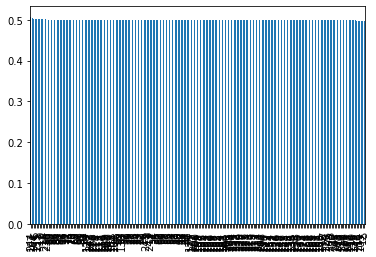

In [30]:
roc_values.plot.bar()

In [31]:
sel=roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [32]:
x_train_roc=x_train_unique[sel.index]
x_test_roc=x_test_unique[sel.index]

### Build the model and compare the performance

In [33]:
def run_randomforest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy on the set:',accuracy_score(y_test,y_pred))

In [34]:
%%time
run_randomforest(x_train_roc,x_test_roc,y_train,y_test)

Accuracy on the set: 0.95275
Wall time: 678 ms


In [35]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on the set: 0.9585
Wall time: 1.18 s


## Use of ANOVA in classification problem

In [59]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif , f_regression

In [60]:
#data : 위에서 쓴 데이터랑 동일함

In [77]:
x_train_unique.shape , x_test_unique.shape , x_train.shape

((16000, 227), (4000, 227), (16000, 370))

#### Now do F-Test

In [79]:
sel=f_classif(x_train_unique,y_train)
sel  #첫번째 array:F-score , 두번째 array: p-value

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [80]:
p_values=pd.Series(sel[1])
p_values.index=x_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

<AxesSubplot:>

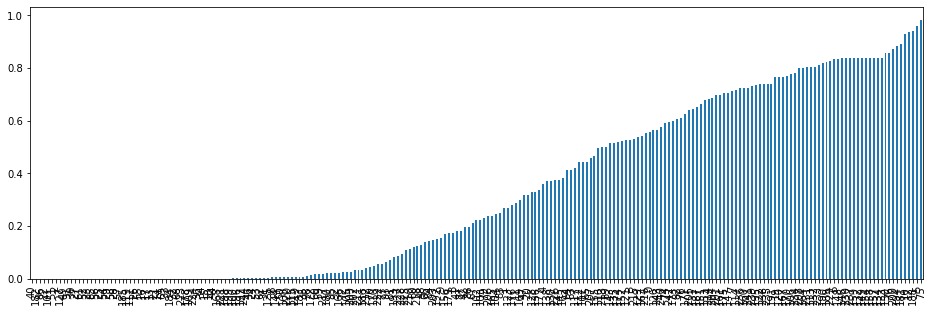

In [82]:
p_values.plot.bar(figsize=(16,5))

In [84]:
p_values=p_values[p_values<0.05]

In [85]:
p_values.index

Int64Index([ 40, 182,  86,  22, 101,  51,   2, 127,  49,  91,  30,  27,  61,
             52,  23,  85,  56,  25,  54,  29,  58,  28,  57, 185, 119, 111,
             26,  55,  16,  17,  13,  21,  14,  69,  33, 184,  32,  68, 223,
            178, 109, 224,  36,  34,  15,  18,  44, 168, 221, 198, 199, 100,
            196, 197, 244,  46,  24,  53,  62,  31, 125,  38, 144,  50, 108,
            220, 115, 219, 183,  35,  98, 172,  60,  59, 217, 180,  95,  92,
            166,  72, 105, 209, 202, 211, 186, 212,  70, 110],
           dtype='int64')

In [86]:
x_train_p=x_train_unique[p_values.index]
x_test_p=x_test_unique[p_values.index]

#### build the classifier and compare the performance

In [87]:
%%time
run_randomforest(x_train_p,x_test_p,y_train,y_test)

Accuracy on the set: 0.953
Wall time: 682 ms


In [88]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on the set: 0.9585
Wall time: 1.04 s


## Use of root-MSE in Regression problem

In [36]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [37]:
boston=load_boston()

In [38]:
x=pd.DataFrame(data=boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y=boston.target

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
mse=[]
for feature in x_train.columns:
    clf=LinearRegression()
    clf.fit(x_train[feature].to_frame(),y_train)
    y_pred=clf.predict(x_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))

In [50]:
mse

[76.38674157646072,
 84.66034377707905,
 77.02905244667242,
 79.36120219345942,
 76.95375968209434,
 46.907351627395315,
 80.3915476111525,
 82.61874125667717,
 82.46499985731933,
 78.30831374720843,
 81.79497121208001,
 77.75285601192716,
 46.33630536002592]

In [51]:
mse=pd.Series(mse,index=x_train.columns)

In [53]:
mse.sort_values(ascending=False,inplace=True)
mse

ZN         84.660344
DIS        82.618741
RAD        82.465000
PTRATIO    81.794971
AGE        80.391548
CHAS       79.361202
TAX        78.308314
B          77.752856
INDUS      77.029052
NOX        76.953760
CRIM       76.386742
RM         46.907352
LSTAT      46.336305
dtype: float64

<AxesSubplot:>

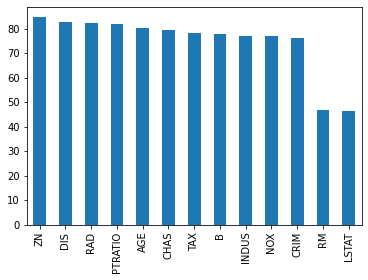

In [54]:
mse.plot.bar()

In [55]:
x_train_2=x_train[['RM','LSTAT']]
x_test_2=x_test[['RM','LSTAT']]

In [57]:
%%time
model=LinearRegression()
model.fit(x_train_2,y_train)
y_pred=model.predict(x_test_2)
print('r2_score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('std of house price:',np.std(y))

r2_score: 0.5409084827186417
RMSE: 6.114172522817782
std of house price: 9.188011545278203
Wall time: 4.06 ms


In [58]:
%%time
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('std of house price:',np.std(y))

r2_score: 0.5892223849182524
RMSE: 5.783509315085124
std of house price: 9.188011545278203
Wall time: 6.98 ms
